# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Daniel Rangga Hardianto Wibowo
- **Email:** danielranggahardiyanto@gmail.com
- **ID Dicoding:** ranggahardianto

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan musim berpengaruh pada jumlah penyewaan sepeda sepanjang tahun 2011-2012?
- Bagaimana distribusi penyewaan sepeda pada hari kerja?

## Import Semua Packages/Library yang Digunakan

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [15]:
hour_df = pd.read_csv("data/hour.csv")
day_df = pd.read_csv("data/day.csv")

### Assessing Data

In [16]:
print(hour_df.info())
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

### Cleaning Data

#### Missing Value

In [17]:
print(hour_df.isnull().sum())
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### Duplicate Data

In [18]:
print(hour_df.duplicated().sum())
print(day_df.duplicated().sum())

0
0


In [19]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

## Exploratory Data Analysis (EDA)

### Explore

#### Exploring Data

In [20]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15517,15518,2012-10-13,4,1,10,18,0,6,0,1,0.46,0.4545,0.44,0.1343,174,299,473
5124,5125,2011-08-06,3,0,8,10,0,6,0,2,0.74,0.6970,0.70,0.2836,91,199,290
10900,10901,2012-04-04,2,1,4,8,0,3,1,2,0.44,0.4394,0.72,0.1045,31,653,684
3191,3192,2011-05-17,2,0,5,21,0,2,1,1,0.54,0.5152,0.88,0.2537,23,151,174
5220,5221,2011-08-10,3,0,8,10,0,3,1,1,0.80,0.7273,0.43,0.2239,41,72,113


In [21]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [22]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
634,635,2012-09-26,4,1,9,0,3,1,1,0.635000,0.596613,0.630833,0.244400,787,6946,7733
21,22,2011-01-22,1,0,1,0,6,0,1,0.059130,0.079070,0.400000,0.171970,93,888,981
562,563,2012-07-16,3,1,7,0,1,1,1,0.763333,0.724125,0.645000,0.164187,1088,5742,6830
548,549,2012-07-02,3,1,7,0,1,1,1,0.781667,0.702038,0.447083,0.195267,904,5323,6227
228,229,2011-08-17,3,0,8,0,3,1,1,0.723333,0.666671,0.575417,0.143667,668,4026,4694


In [23]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


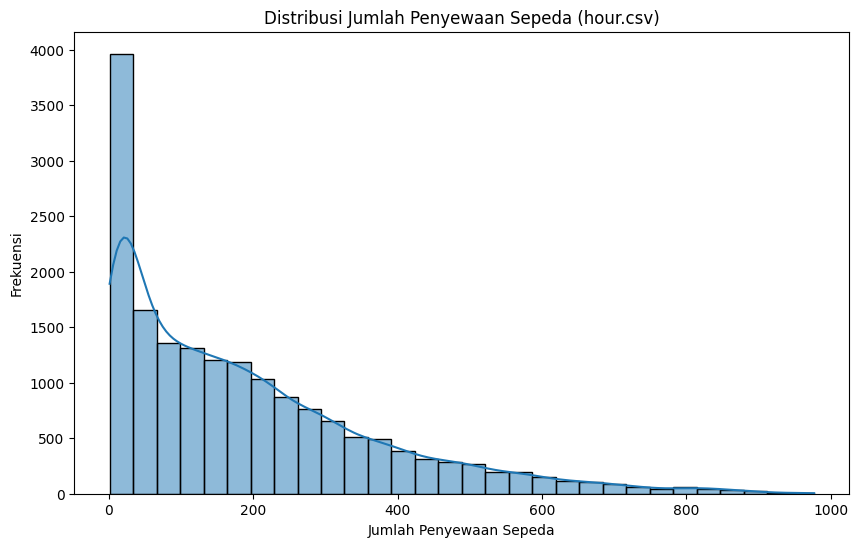

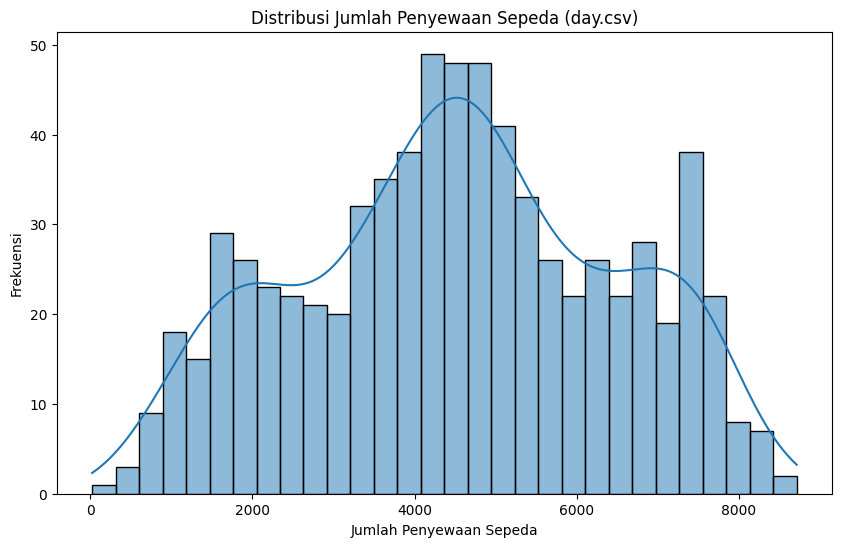

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda (hour.csv)')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda (day.csv)')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

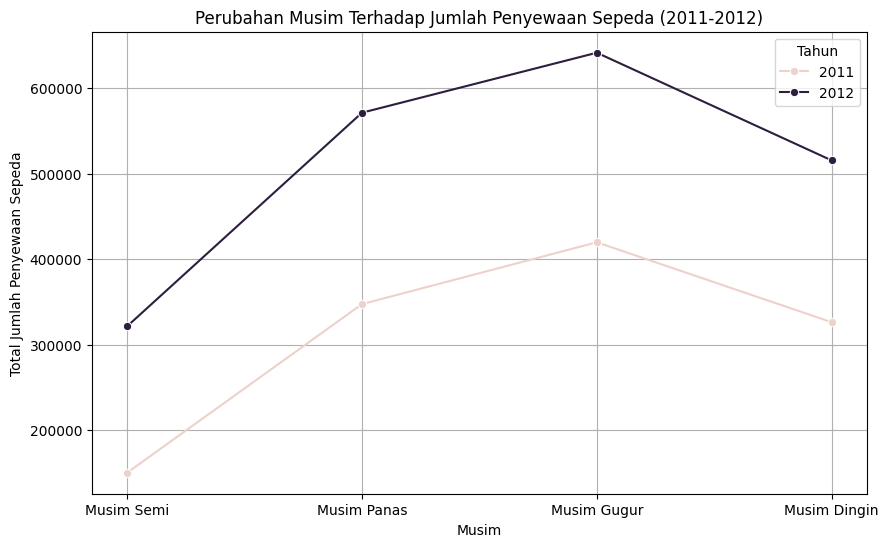

In [25]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

day_df['year'] = day_df['dteday'].dt.year

seasonal_rentals = day_df.groupby(['year', 'season'])['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonal_rentals, x='season', y='cnt', hue='year', marker='o')
plt.title('Perubahan Musim Terhadap Jumlah Penyewaan Sepeda (2011-2012)')
plt.xlabel('Musim')
plt.ylabel('Total Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.legend(title='Tahun')
plt.grid(True)
plt.show()


Dari pertanyaan 1 didapatkan bahwa penyewaan sepeda terjadi paling banyak pada musim gugur di tahun 2011-2012

### Pertanyaan 2:

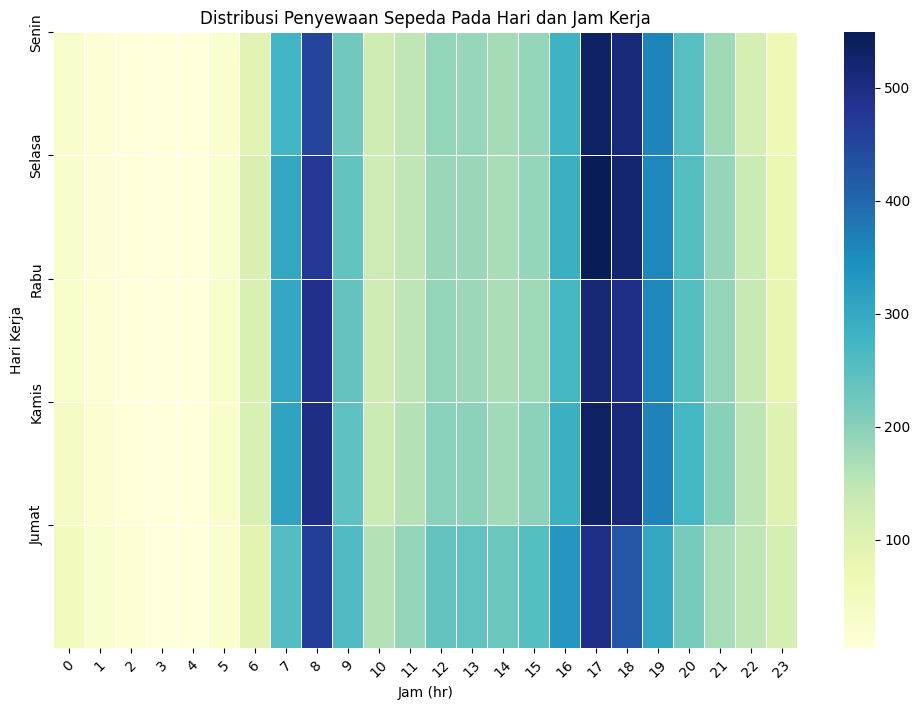

In [26]:
hourly_workday_rentals = hour_df[hour_df['workingday'] == 1].groupby(['weekday', 'hr'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 8))
heatmap_data = hourly_workday_rentals.pivot(index='weekday', columns='hr', values='cnt')
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Distribusi Penyewaan Sepeda Pada Hari dan Jam Kerja')
plt.xlabel('Jam (hr)')
plt.ylabel('Hari Kerja')
plt.xticks(rotation=45)
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat'])
plt.show()

Dari pertanyaan 2 didapatkan bahwa persebaran penyewaan sepeda pada hari kerja hampir sama setiap harinya. Penyewaan paling banyak terjadi di jam 8 dan jam 17

## Conclusion

- Penyewaan sepeda mencapai titik paling tingginya di musim gugur
- Penyewaan sepeda terjadi paling banyak di jam berangkat kerja yaitu jam 8 pagi dan jam pulang kerja yaitu jam 5 sore